In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [6]:
digits= load_digits()

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

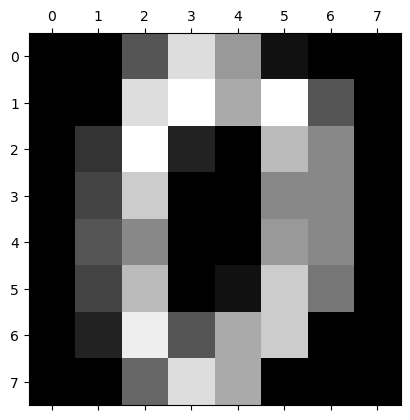

In [9]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 640x480 with 0 Axes>

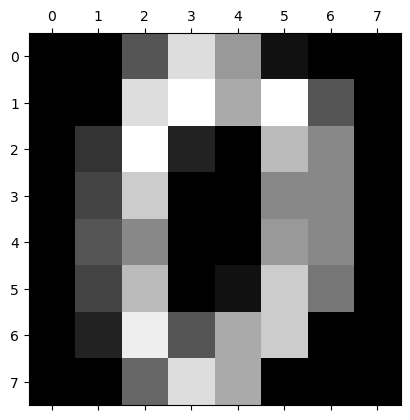

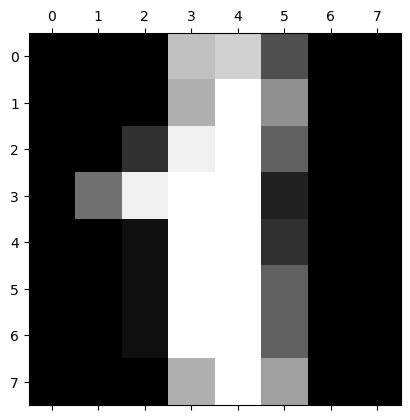

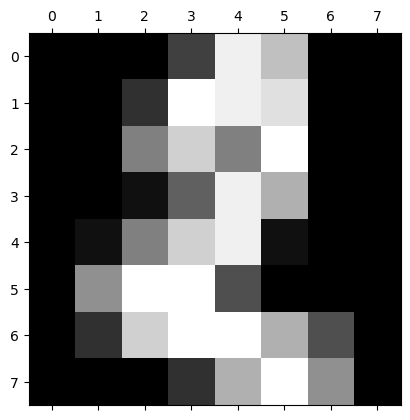

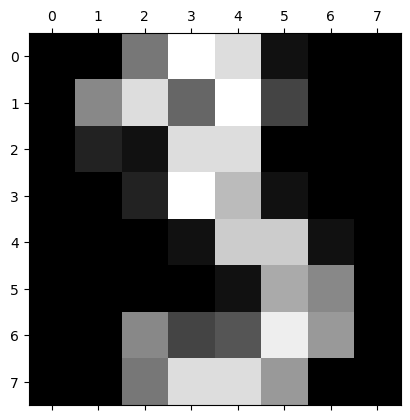

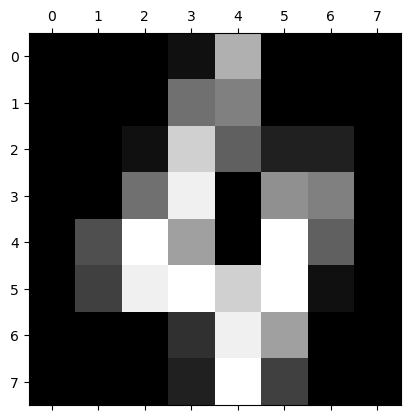

In [10]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [11]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [12]:
X_train, X_test, y_train, y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [13]:
len(X_train)

1437

In [14]:
len(X_test)

360

In [15]:
from sklearn.linear_model import LogisticRegression

# See stackoverflow for the max_iter

In [16]:
model=LogisticRegression(solver='lbfgs', max_iter=10000)        #https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

In [17]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [18]:
model.score(X_test,y_test)

0.9555555555555556

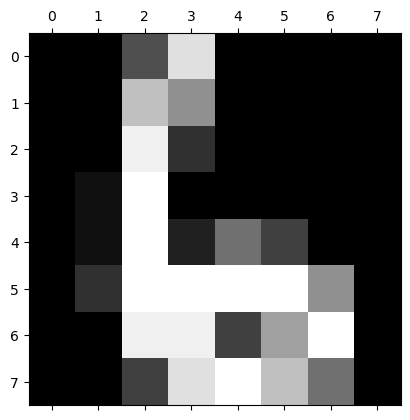

In [19]:
plt.matshow(digits.images[67])

In [20]:
digits.target[67]

6

In [21]:
model.predict([digits.data[67]])        #our prediction is correct hurray

array([6])

In [22]:
model.predict(digits.data[0:5])        #our prediction is correct hurray

array([0, 1, 2, 3, 4])

# Confusion matrix

In [23]:
y_predicted=model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm=confusion_matrix(y_test,y_predicted)

In [26]:
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  0,  0,  2,  0,  0, 24,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 31]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

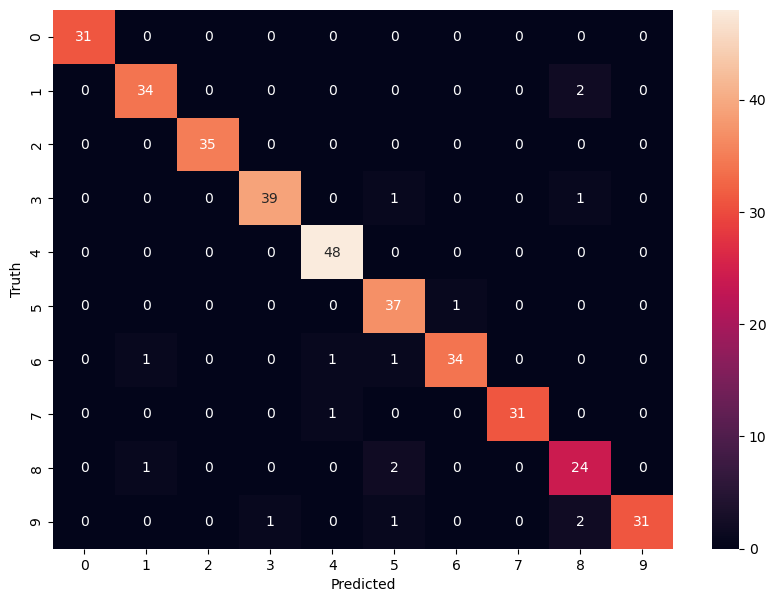

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel("Truth")